# 📊 06_Model_Comparison with Visual Diagnostics

This notebook compares two Random Forest models (yours and your teammate's) using:

- ✅ Key Evaluation Metrics (R², RMSE, Adj R², MAPE, SMAPE)
- 📉 Side-by-side bar charts
- 🔍 Prediction scatter plots (true vs predicted)
- 📉 Distribution of prediction errors

These diagnostics help understand each model’s predictive power and error behavior.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

# Load metrics
metrics_path = Path.cwd().parent / "Experiments" / "tm_rf_model_metrics.csv"
df = pd.read_csv(metrics_path)
df


,Model,Train_R2,Test_R2,Train_Adj_R2,Test_Adj_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Train_MAPE,Test_MAPE,Best_Params
0,Teammate_RF,0.804391,0.782779,0.803728,0.779803,280.39631,269.452218,56.559439,75.161877,0.358675,0.488784,"{'model__max_depth': 17, 'model__max_features'..."
1,Teammate_RF,0.804391,0.782779,0.803728,0.779803,280.39631,269.452218,56.559439,75.161877,0.358675,0.488784,"{'model__max_depth': 17, 'model__max_features'..."
2,Teammate_RF,0.804391,0.782779,0.803728,0.779803,280.39631,269.452218,56.559439,75.161877,0.358675,0.488784,"{'model__max_depth': 17, 'model__max_features'..."
3,Teammate_RF,0.804391,0.782779,0.803728,0.779803,280.39631,269.452218,56.559439,75.161877,0.358675,0.488784,"{'model__max_depth': 17, 'model__max_features'..."
4,Teammate_RF,0.804391,0.782779,0.803728,0.779803,280.39631,269.452218,56.559439,75.161877,0.358675,0.488784,"{'model__max_depth': 17, 'model__max_features'..."


/var/folders/g6/7lfc4f6j28n_5kvlpysq13h80000gn/T/ipykernel_19814/158425145.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/miniconda3/envs/dsi_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


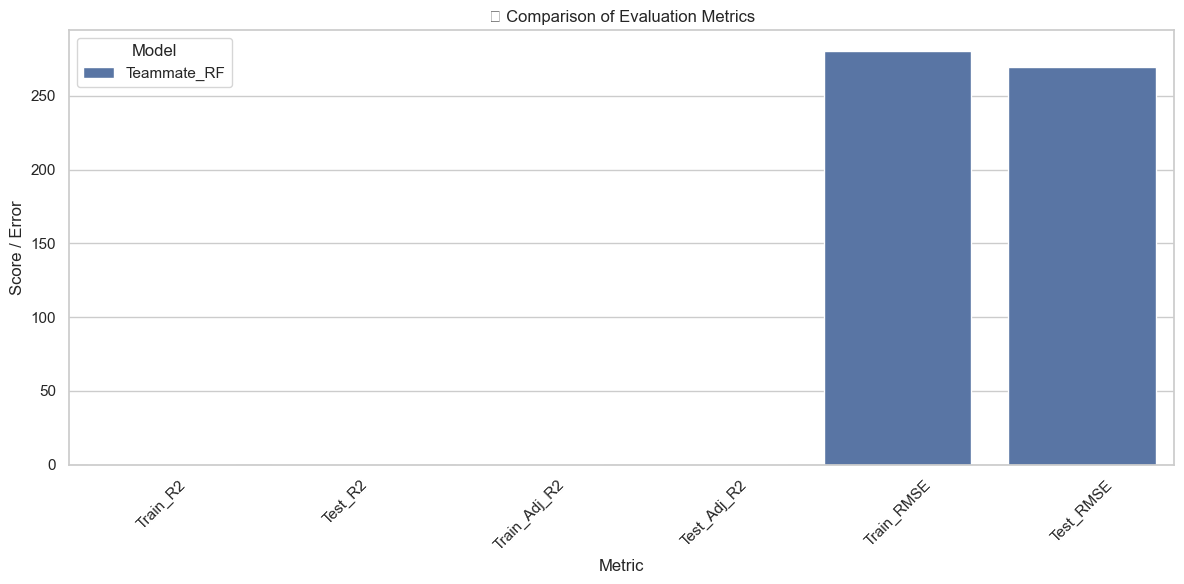

In [2]:
# Melt and filter key metrics
melted = df.melt(id_vars='Model', var_name='Metric', value_name='Value')
metrics_to_plot = ["Train_R2", "Test_R2", "Train_RMSE", "Test_RMSE", "Train_Adj_R2", "Test_Adj_R2"]
comp_df = melted[melted['Metric'].isin(metrics_to_plot)]

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=comp_df, x="Metric", y="Value", hue="Model")
plt.title("📊 Comparison of Evaluation Metrics")
plt.ylabel("Score / Error")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# Load predictions for both models
artifacts_dir = Path.cwd().parent / "Models" / "Artifacts"
my_pred_rf = pd.read_csv(artifacts_dir / "top_rf_prediction_errors.csv")
tm_preds = pd.read_csv(artifacts_dir / "top_tm_prediction_errors.csv")

# Rename columns for consistency
my_pred_rf = my_pred_rf[['Actual', 'Predicted']]
tm_preds = tm_preds[['Actual_tm', 'Predicted_tm']]

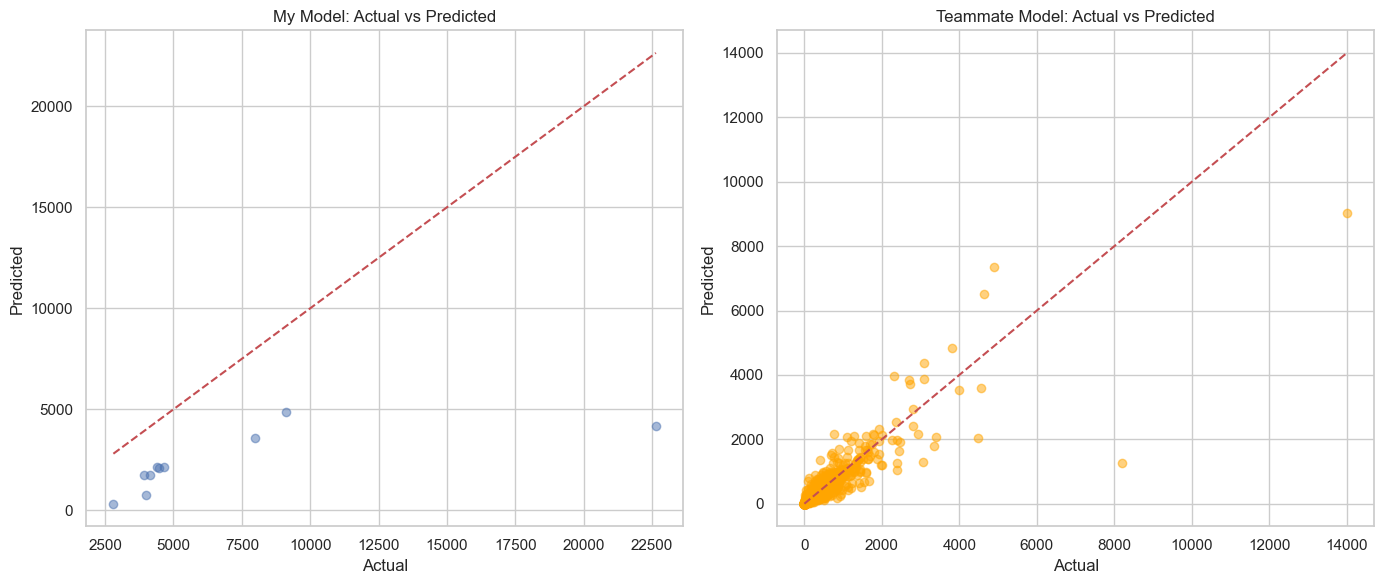

In [13]:
# ✅ Fixed version of your scatter plots
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# My model: Actual vs Predicted
ax[0].scatter(my_pred_rf['Actual'], my_pred_rf['Predicted'], alpha=0.5)
ax[0].plot(
    [my_pred_rf['Actual'].min(), my_pred_rf['Actual'].max()],
    [my_pred_rf['Actual'].min(), my_pred_rf['Actual'].max()],
    'r--'
)
ax[0].set_title("My Model: Actual vs Predicted")
ax[0].set_xlabel("Actual")
ax[0].set_ylabel("Predicted")

# Teammate model: Actual vs Predicted
ax[1].scatter(tm_preds['Actual_tm'], tm_preds['Predicted_tm'], alpha=0.5, color='orange')
ax[1].plot(
    [tm_preds['Actual_tm'].min(), tm_preds['Actual_tm'].max()],
    [tm_preds['Actual_tm'].min(), tm_preds['Actual_tm'].max()],
    'r--'
)
ax[1].set_title("Teammate Model: Actual vs Predicted")
ax[1].set_xlabel("Actual")
ax[1].set_ylabel("Predicted")

plt.tight_layout()
plt.show()


/var/folders/g6/7lfc4f6j28n_5kvlpysq13h80000gn/T/ipykernel_18190/524351679.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/opt/miniconda3/envs/dsi_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


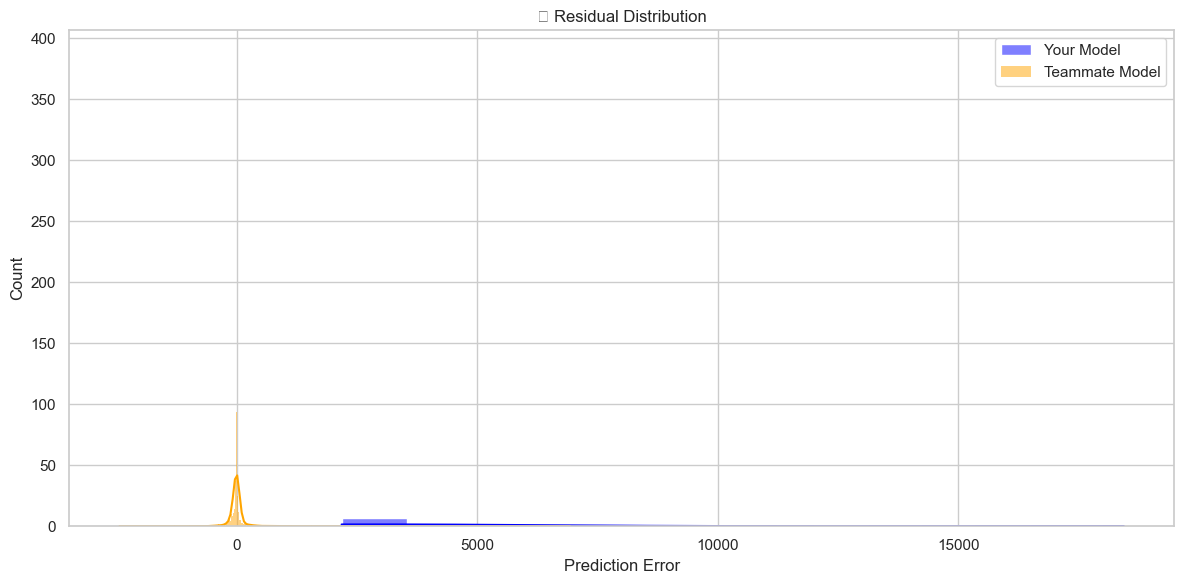

In [ ]:
# Residuals
your_preds['Residual'] = your_preds['Actual'] - your_preds['Predicted']
tm_preds['Residual'] = tm_preds['Actual_tm'] - tm_preds['Predicted_tm']

plt.figure(figsize=(12, 6))
sns.histplot(your_preds['Residual'], color='blue', label="Your Model", kde=True)
sns.histplot(tm_preds['Residual'], color='orange', label="Teammate Model", kde=True)
plt.title("📉 Residual Distribution")
plt.xlabel("Prediction Error")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Export metrics for reporting
print("## 📋 Model Comparison Table")
print(df.to_markdown(index=False))


## 📋 Model Comparison Table
| Model       |   Train_R2 |   Test_R2 |   Train_Adj_R2 |   Test_Adj_R2 |   Train_RMSE |   Test_RMSE |   Train_MAE |   Test_MAE |   Train_MAPE |   Test_MAPE | Best_Params                                                                                                    |
|:------------|-----------:|----------:|---------------:|--------------:|-------------:|------------:|------------:|-----------:|-------------:|------------:|:---------------------------------------------------------------------------------------------------------------|
| Teammate_RF |   0.804391 |  0.782779 |       0.803728 |      0.779803 |      280.396 |     269.452 |     56.5594 |    75.1619 |     0.358675 |    0.488784 | {'model__max_depth': 17, 'model__max_features': 0.7, 'model__min_samples_leaf': 5, 'model__n_estimators': 444} |
| Teammate_RF |   0.804391 |  0.782779 |       0.803728 |      0.779803 |      280.396 |     269.452 |     56.5594 |    75.1619 |     0.358675 |    0.488784